<a href="https://colab.research.google.com/github/abhinowo/BangkitCapstone/blob/main/CapstoneANCANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT  - B21-CAP0252

- Ainiyyah M2472349
- Amora Devi Larasati C0100996
- Aryo Anindyo Abhinowo M2001980	
- Muhammad Abdullah Rasyad A0121261
- Rizal Yusuf Audri C0121209
- Taufik Fadlurahman Fajari A0121265





## Top-Down Approach 

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image. Secara garis besarnya, CNN memanfaatkan proses konvolusi dengan menggerakan sebuah kernel konvolusi (filter) berukuran tertentu ke sebuah gambar, komputer mendapatkan informasi representatif baru dari hasil perkalian bagian gambar tersebut dengan filter yang digunakan.

## Project Objectives

Kasus ini merupakan pengolahan pengenalan pola dari berbagai macam tempat yang ada sehingga nanti nya bisa diklasifikasikan secara supervised learning. Dataset yang kami ambil berasal dari pyimage search dengan judul  [Natural Disaster Image Dataset](https://drive.google.com/u/0/uc?id=1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q&export=download) 

Project ini berfokus kepada
- Exploratory Data
- Reshapping & Labeling
- Membuat Prediksi 
- Saving model
- Deploying 


## 1. Import Library and Data

### 1.1 Load Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/NDD/'

Mounted at /content/drive


### 1.2 Import Library

In [ ]:
# import libraries 
import tensorflow as tf 
assert tf.__version__.startswith('2')
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from google.colab import files
from keras.preprocessing import image

# utilities library
import cv2
import os

import random 
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

1  **About this Data**: 

We will use the Natural Disaster Dataset. The data will be normalized so its value will ranging from 0 to 1. 

The dataset we used was created by Gautam Kumar and it consists of 4 classes

- Cyclone : 928 images
- Earthquake : 1350 images
- Flood : 1073 images
- Wildfire : 1077 Images


The label will be denoted as numbers, which follow this mapping : 

|    | Expression   |
|---:|:-------------|
|  0 | CYCLONE          |
|  1 | FLOOD          |
|  2 |  EARTHQUAKE        |
|  3 |  WILDFIRE   |




### 1.3 Data Preprocessing


In [ ]:
#@title Code for loading the data
data_path = 'drive/MyDrive/NDD/'
data_dir_list = os.listdir(data_path)

img_data_list=[]
img_label = []
label_map = {}
i = 0 

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    label_map[i] = str(dataset)
    
    # print ('Load the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_label.append(i)
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img_resize)
    i += 1

img_data = np.array(img_data_list)
img_data = img_data.astype('float')
img_data = img_data/255 #normalization
img_label = np.array(img_label)

def getlabel(id):
    return label_map[id]

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_data, img_label, test_size=0.2, random_state=0)

### 1.4 Data Exploration

Some insights we can get from the output are:

- The data consist of 4428 images
- It has 4 variables (or class)


In [ ]:
label_map

{0: 'Cyclone', 1: 'Flood', 2: 'Earthquake', 3: 'Wildfire'}

In [ ]:
img_data.shape

(4428, 224, 224, 3)

In [ ]:
x_test.shape

(886, 224, 224, 3)

In [ ]:
x_train.shape

(3542, 224, 224, 3)

In [ ]:
x_train[0]

array([[[0.87843137, 0.9372549 , 0.94901961],
        [0.86666667, 0.92941176, 0.96862745],
        [0.86666667, 0.94509804, 0.96470588],
        ...,
        [0.87058824, 0.92156863, 0.97647059],
        [0.85098039, 0.92941176, 0.95686275],
        [0.87058824, 0.92941176, 0.96078431]],

       [[0.87843137, 0.9372549 , 0.98431373],
        [0.86666667, 0.9254902 , 0.98823529],
        [0.87058824, 0.94901961, 0.97254902],
        ...,
        [0.85882353, 0.92941176, 0.97254902],
        [0.83921569, 0.92941176, 0.96078431],
        [0.89803922, 0.93333333, 0.98431373]],

       [[0.8745098 , 0.94117647, 0.98823529],
        [0.87058824, 0.92941176, 0.98039216],
        [0.8745098 , 0.94901961, 0.94901961],
        ...,
        [0.92941176, 0.9372549 , 0.92941176],
        [0.8745098 , 0.94509804, 0.97254902],
        [0.88627451, 0.9254902 , 0.98039216]],

       ...,

       [[0.8627451 , 0.93333333, 0.97254902],
        [0.87058824, 0.93333333, 0.96470588],
        [0.87843137, 0

2

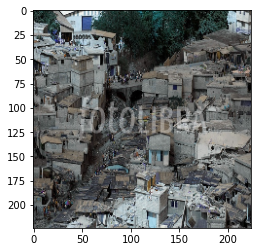

In [ ]:
plt.imshow(x_train[12])
y_train[12]

### 1.5 Diplay the Data

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(img_label[labels[i]])
    plt.show()

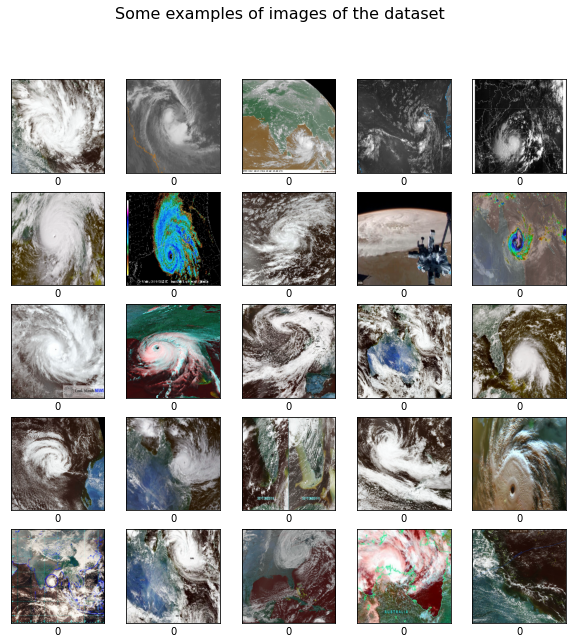

In [ ]:
display_examples(x_train,img_data , img_label)

## 2. Create the Model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import regularizers

model_cnn = keras.Sequential()

#Regularization optimizes a model by penalizing complex models, therefore minimizing loss and complexity. 
model_cnn.add(keras.layers.Conv2D(filters=16, kernel_size=(7,7), input_shape=(224,224,3), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn.add(keras.layers.MaxPooling2D())
model_cnn.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu",  kernel_regularizer=regularizers.l2(l=0.01)))
model_cnn.add(keras.layers.MaxPooling2D())
model_cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model_cnn.add(keras.layers.MaxPooling2D())
model_cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation="relu"))
model_cnn.add(keras.layers.MaxPooling2D())

#using dropout
model_cnn.add(keras.layers.Dropout(0.7))

model_cnn.add(keras.layers.Flatten()) # flatten layer 
model_cnn.add(keras.layers.Dense(units = 64, activation='relu') )  #input layer 
model_cnn.add(keras.layers.Dense(units = 16, activation='relu') )  # hidden layer 
model_cnn.add(keras.layers.Dense(units = 4, activation='softmax') ) # output layer 

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      2368      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 16)      6416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)       

## 3. Train the Model

In [ ]:
history = model_cnn.fit(x_train, y_train, validation_data= (x_test,y_test), epochs=15);

Epoch 1/15
111/111 [==============================] - 18s 27ms/step - loss: 1.3509 - accuracy: 0.4136 - val_loss: 1.0877 - val_accuracy: 0.5711
Epoch 2/15
111/111 [==============================] - 2s 22ms/step - loss: 0.9010 - accuracy: 0.6739 - val_loss: 0.7717 - val_accuracy: 0.7517
Epoch 3/15
111/111 [==============================] - 2s 22ms/step - loss: 0.7547 - accuracy: 0.7295 - val_loss: 0.6898 - val_accuracy: 0.7641
Epoch 4/15
111/111 [==============================] - 2s 22ms/step - loss: 0.6904 - accuracy: 0.7665 - val_loss: 0.7086 - val_accuracy: 0.7540
Epoch 5/15
111/111 [==============================] - 2s 22ms/step - loss: 0.6286 - accuracy: 0.7832 - val_loss: 0.6719 - val_accuracy: 0.7788
Epoch 6/15
111/111 [==============================] - 2s 22ms/step - loss: 0.5699 - accuracy: 0.8058 - val_loss: 0.5626 - val_accuracy: 0.8205
Epoch 7/15
111/111 [==============================] - 2s 22ms/step - loss: 0.5174 - accuracy: 0.8306 - val_loss: 0.5826 - val_accuracy: 0.813

### Visualize


In [ ]:
def plot_acc_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

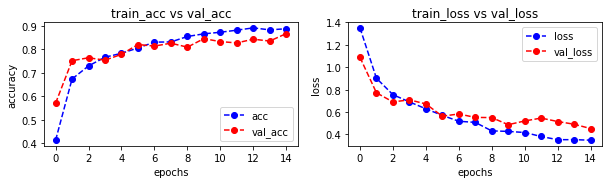

In [ ]:
plot_acc_loss(history)

## 4. Testing the Model

In [ ]:
score_accuracy = model_cnn.evaluate(x_test, y_test)

28/28 [==============================] - 0s 11ms/step - loss: 0.4525 - accuracy: 0.8668


### Predicting Image by Uploading

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn

img = image.load_img(path , target_size=(224,224))
x = image.img_to_array(img)
x=np.expand_dims(x,axis=0)

images = np.vstack([x])
classes = model_cnn.predict_classes(images,batch_size=20)

print(fn)

if classes==0:
    print('cyclone')
elif classes==1:
    print('flood')
elif classes==2:
    print('earthquake')
else:
    print('wildfire')

Saving topan.jpg to topan.jpg
topan.jpg
earthquake


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## 5. Saving the Model

### 5.1 Save to H5

In [ ]:
#Save the trained model as a Keras HDF5 file. 
saved_model_path = "./my_modelcnn.h5"

model_cnn.save(saved_model_path)

### 5.2 Save to TFLITE

In [ ]:
import time
t = time.time()

export_path_sm = "./{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model_cnn, export_path_sm)

./1622902145

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ./1622902145/assets


In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("/content/1622902145") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

### 5.3 Save to JSON

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = model_cnn.to_json()
#save the model architecture to JSON file
with open('cnn.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model_cnn.save_weights('./my_modelcnn.h5')

### 5.4 Save to Saved_Model

In [ ]:
# Save model_1
model_cnn.save("cnn_model")

INFO:tensorflow:Assets written to: cnn_model/assets


## 6. Download File

### 6.1 Download Workspace folder

In [ ]:
import shutil
#nama folder yang diinginin, zip, path directori folder
shutil.make_archive('/content/saved_model', 'zip', '/content/cnn_model')

'/content/saved_model.zip'

### 6.2 Download savedfile

In [ ]:
#download savedfile

from google.colab import files
files.download('/content/') 

# References

CNN model :
- [Predicting by Uploading Image](https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras)


Saving Model related :
- [Save Model to TFLITE](https://www.tensorflow.org/lite/convert)
- [Save Model to JSON](https://towardsdatascience.com/saving-and-loading-keras-model-42195b92f57a)